# Libraries required in this project :-

In [2]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, f1_score, precision_score, recall_score 

# Dataset :-

In [4]:
# Dataset
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Info about dataset :-
### Below we get to know info about dataset which include column_name, data_type(int, float, object), and sum of null values or non-null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Data Cleaning and Pre-processing :-

### Now we will check that, does dataset has any null values or what and also duplicate values. This will give summation of null values of each column in dataset and check duplicates of whole dataset 

In [8]:
# data cleaning
print("Check null values:\n",df.isnull().sum())
print()
print("Check duplicate values:\n",df.duplicated().sum())

Check null values:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Check duplicate values:
 0


# Data Transformation :-

### Here data is transform and new columns are added to dataset and also un-neccessary columns are removed from dataset which may affect the prediction and info of data is rechecked to insure that data is consisting of numeric datatype without any object(string) datatype

In [10]:
# data transformation
present_year = datetime.now().year
df['house_age'] = present_year - df['yr_built']
df['age_since_renovation'] = present_year - df['yr_renovated']
df['age_since_renovation'] = df.apply(lambda row: row['house_age'] if pd.isnull(row['yr_renovated']) else row['age_since_renovation'], axis=1)
df = df.drop(['id','date'],axis=1)
df = df.drop(['zipcode','lat','long','age_since_renovation'],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
 16  house_age      21613 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.8 MB


# Exploratary data analysis :-

### In this section we will analyze data on graphs and charts to find patterns and distribution. here as can see below that dataset is plotted on histogram to check to distribution of dataset few of data columns normally distributed and having bell shape curve and some skwed right or left that are not normally distributed.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>],
       [<Axes: title={'center': 'house_age'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

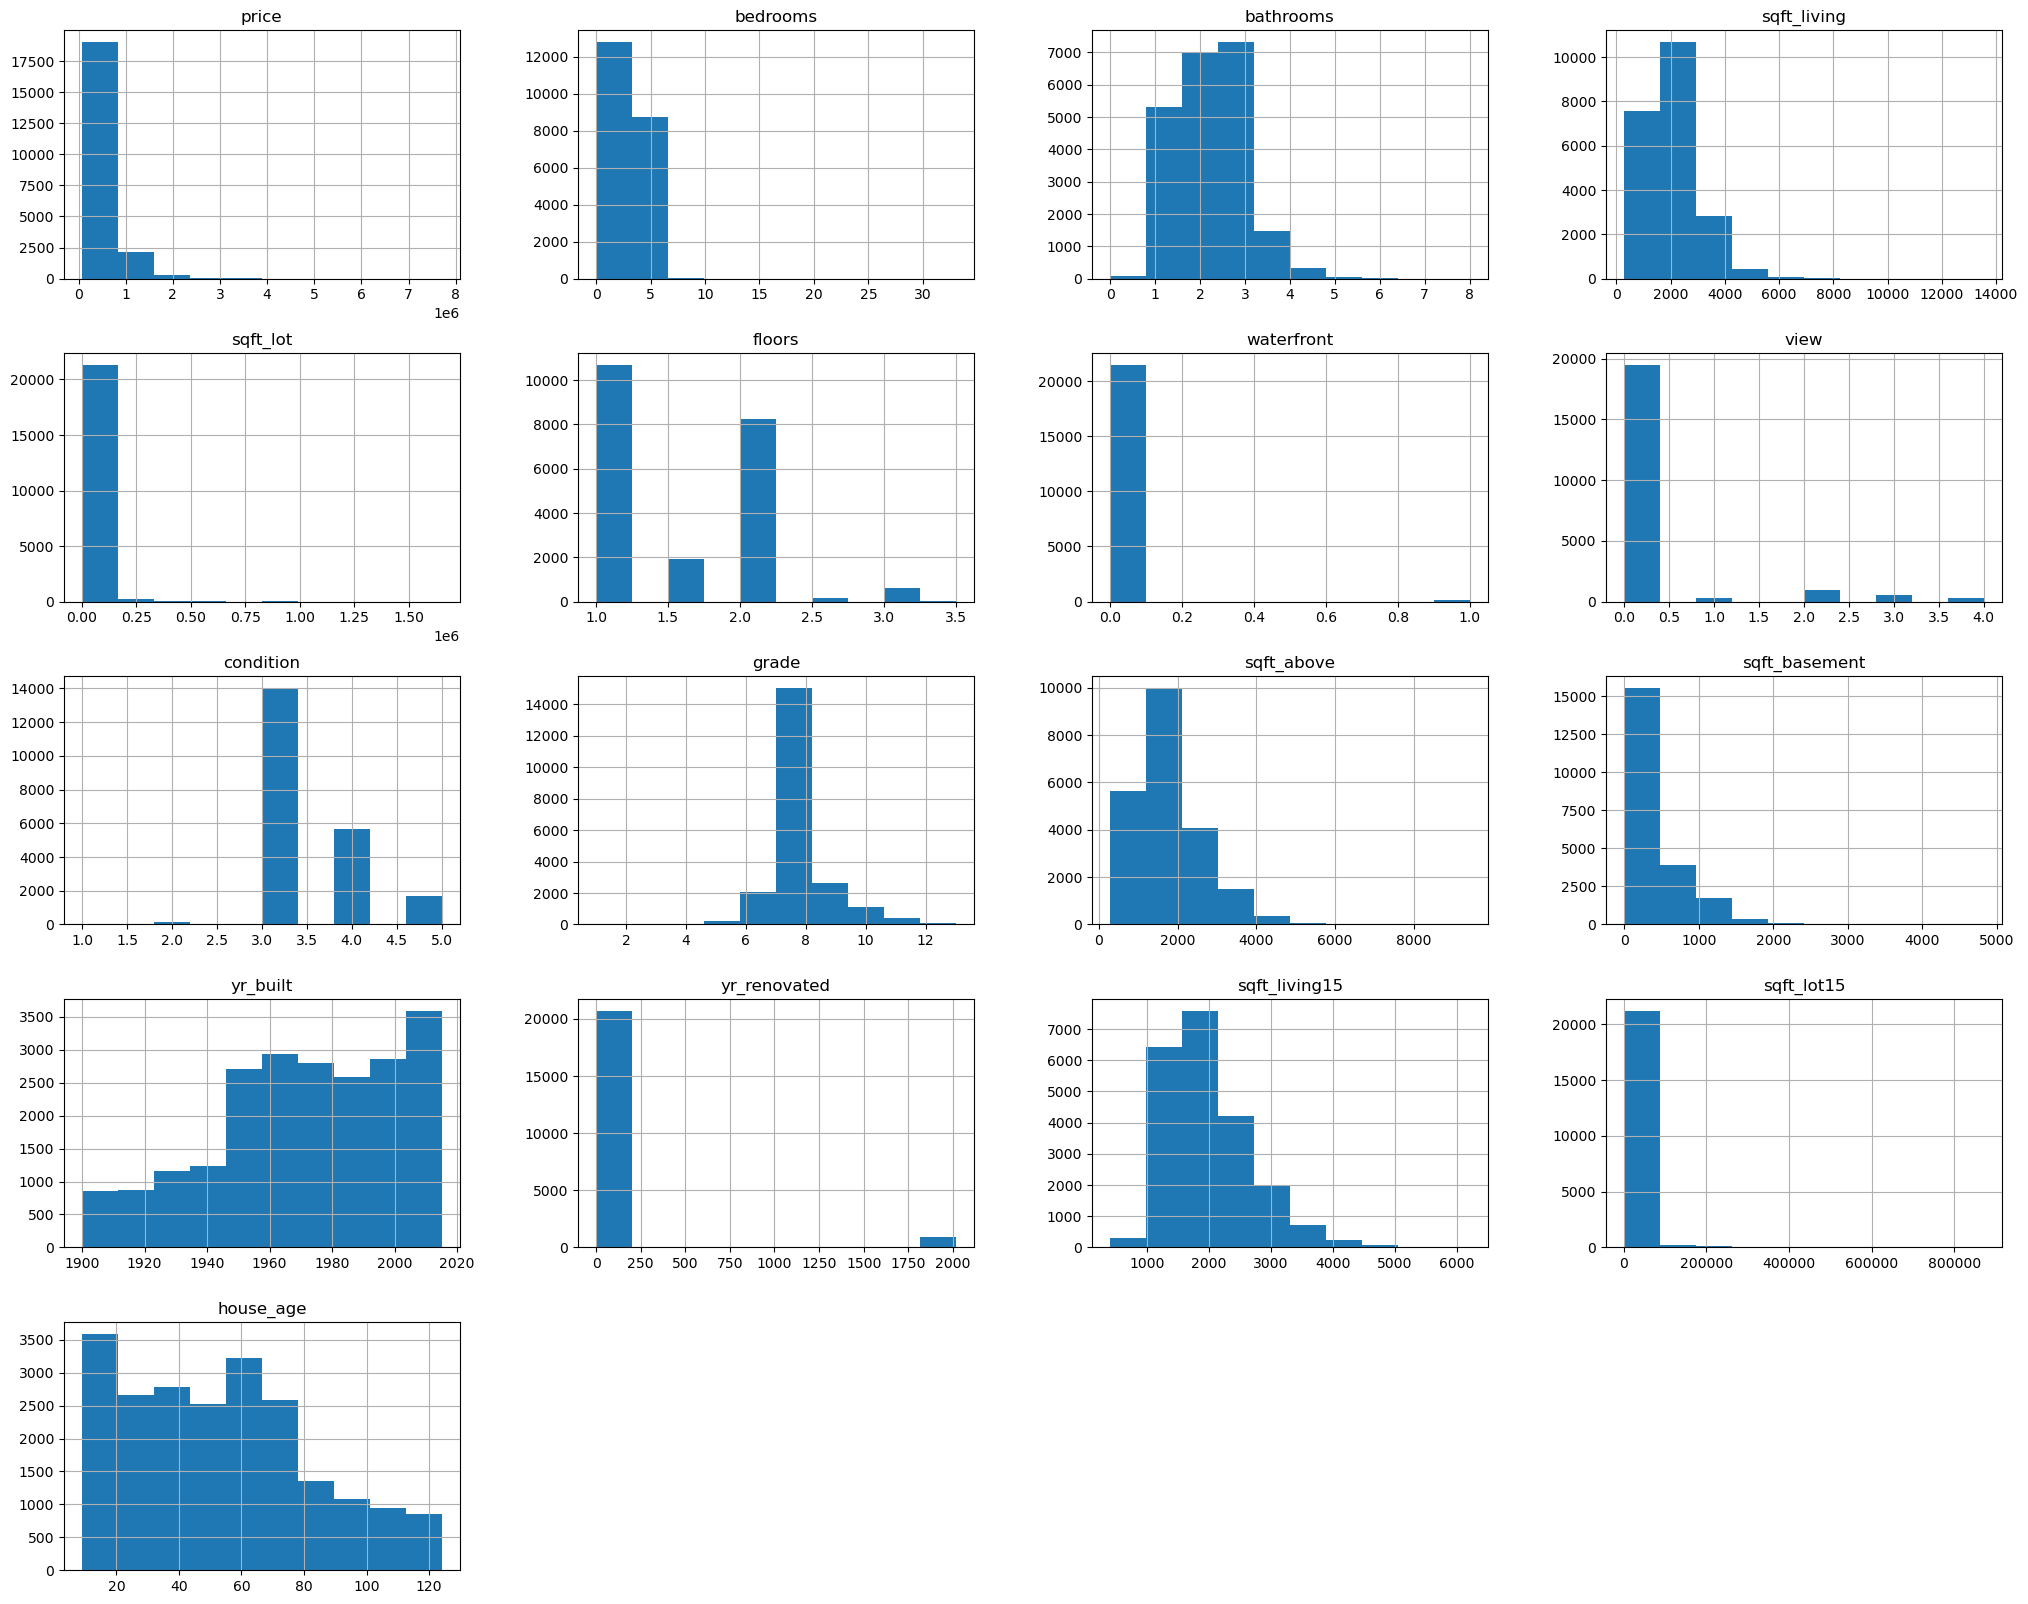

In [13]:
df.hist(figsize=(25,20))

### As data is not normally distributed in some columns for this we will use normalization and standardization.
### Normalization :- First we will normalize data using scikit learn's preprocessing library from which we will import MinMaxScaler(), this will rescale the data into a range of 0 and 1 to contribute equally for analysis.
### Standardization :- Afterwards we will use scikit learn's preprocessing's StandardScaler() module, this we will apply on normalize data to transform the data to have mean of 0 and std(standard_deviation) of 1. This is useful when we want to compare normalized data.

In [15]:
# normalization 

norm = MinMaxScaler()

normal = df[['price','bedrooms','sqft_lot','waterfront','view','condition','sqft_above','sqft_basement','yr_renovated','sqft_living15','sqft_lot15']]

df[['price','bedrooms','sqft_lot','waterfront','view','condition','sqft_above','sqft_basement','yr_renovated','sqft_living15','sqft_lot15']] = norm.fit_transform(normal)




In [16]:
# standardization

scaler = StandardScaler()

standard = df[['price','bedrooms','sqft_lot','waterfront','view','condition','sqft_above','sqft_basement','yr_renovated','sqft_living15','sqft_lot15']]

df[['price','bedrooms','sqft_lot','waterfront','view','condition','sqft_above','sqft_basement','yr_renovated','sqft_living15','sqft_lot15']] = scaler.fit_transform(standard)

## Now we will check for outliers using boxplot.

### Outliers :- This are data points which differ from rest of data points, they are usually high or low values and does not fit general pattern of dataset.
### we find them using boxplot or scatter plot, in scatter plot we find by outlier are differntly get ploted from rest of datapoints and they are away from them.
### In boxplot it pretty simple the points which get ploted outside whiskers of boxplot are considered as outliers, whiskers are extended arms of boxplot which are extended towards high and low values.



<Axes: >

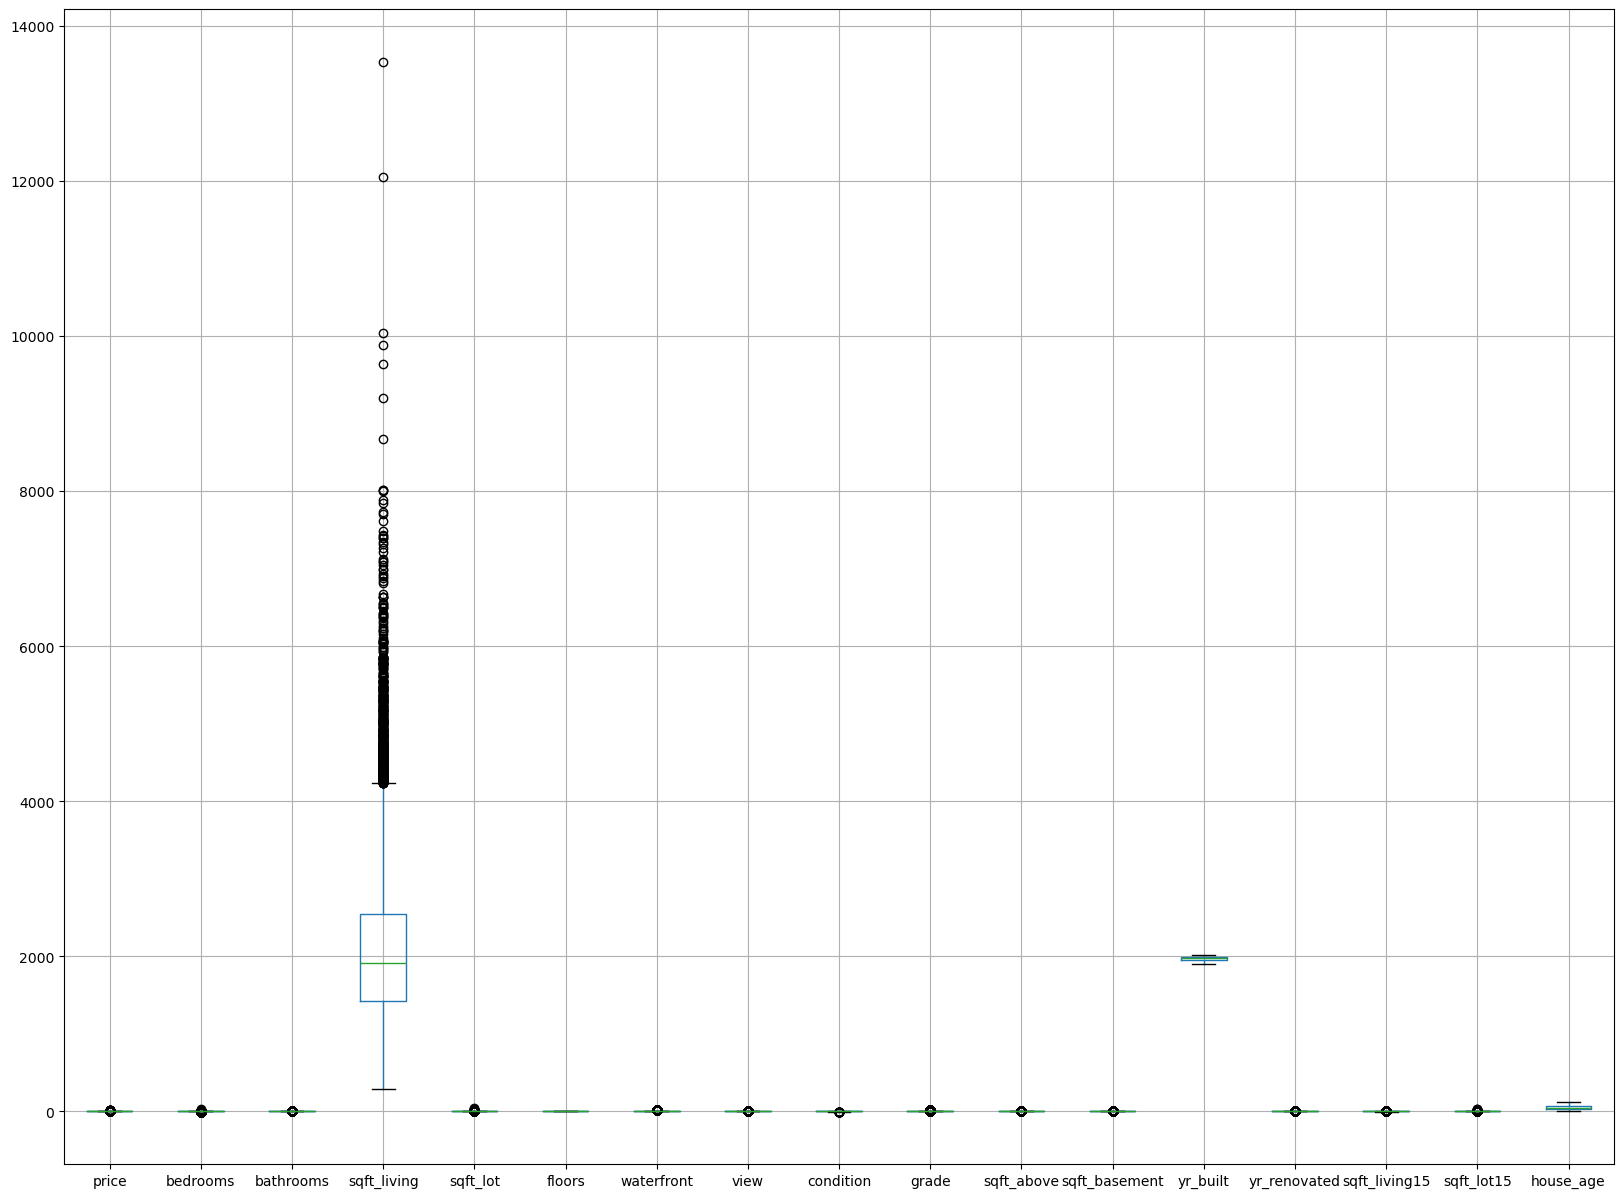

In [18]:
df.boxplot(figsize=(20,15))

### Removing outliers

### we will remove outliers using interquartile method.

### Interquartile method :- Interquartile method divides whole dataset into 2 sets and uses upper bound and lower bound(upper limit and lower limit) to calculate the boundries and values out from that boundries are considered as outliers, below an function is created to calculate outlier of desired column. 

In [20]:
# removing outliers

def remove_outlier(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - 1.5 * iqr
    up_bound = q3 + 1.5 * iqr
    return column[(column >= low_bound) & (column <= up_bound)]

df['price'] = remove_outlier(df['price'])
df['bedrooms'] = remove_outlier(df['bedrooms'])
df['bathrooms'] = remove_outlier(df['bathrooms'])
df['sqft_living'] = remove_outlier(df['sqft_living'])
df['sqft_lot'] = remove_outlier(df['sqft_lot'])
df['waterfront'] = remove_outlier(df['waterfront'])
df['view'] = remove_outlier(df['view'])
df['condition'] = remove_outlier(df['condition'])
df['grade'] = remove_outlier(df['grade'])
df['sqft_above'] = remove_outlier(df['sqft_above'])
df['sqft_basement'] = remove_outlier(df['sqft_basement'])
df['yr_renovated'] = remove_outlier(df['yr_renovated'])
df['sqft_living15'] = remove_outlier(df['sqft_living15'])
df['sqft_lot15'] = remove_outlier(df['sqft_lot15'])

### Here you can see that most of outliers from columns is removed

"plt.boxplot(df['bathrooms'])\nplt.show()"

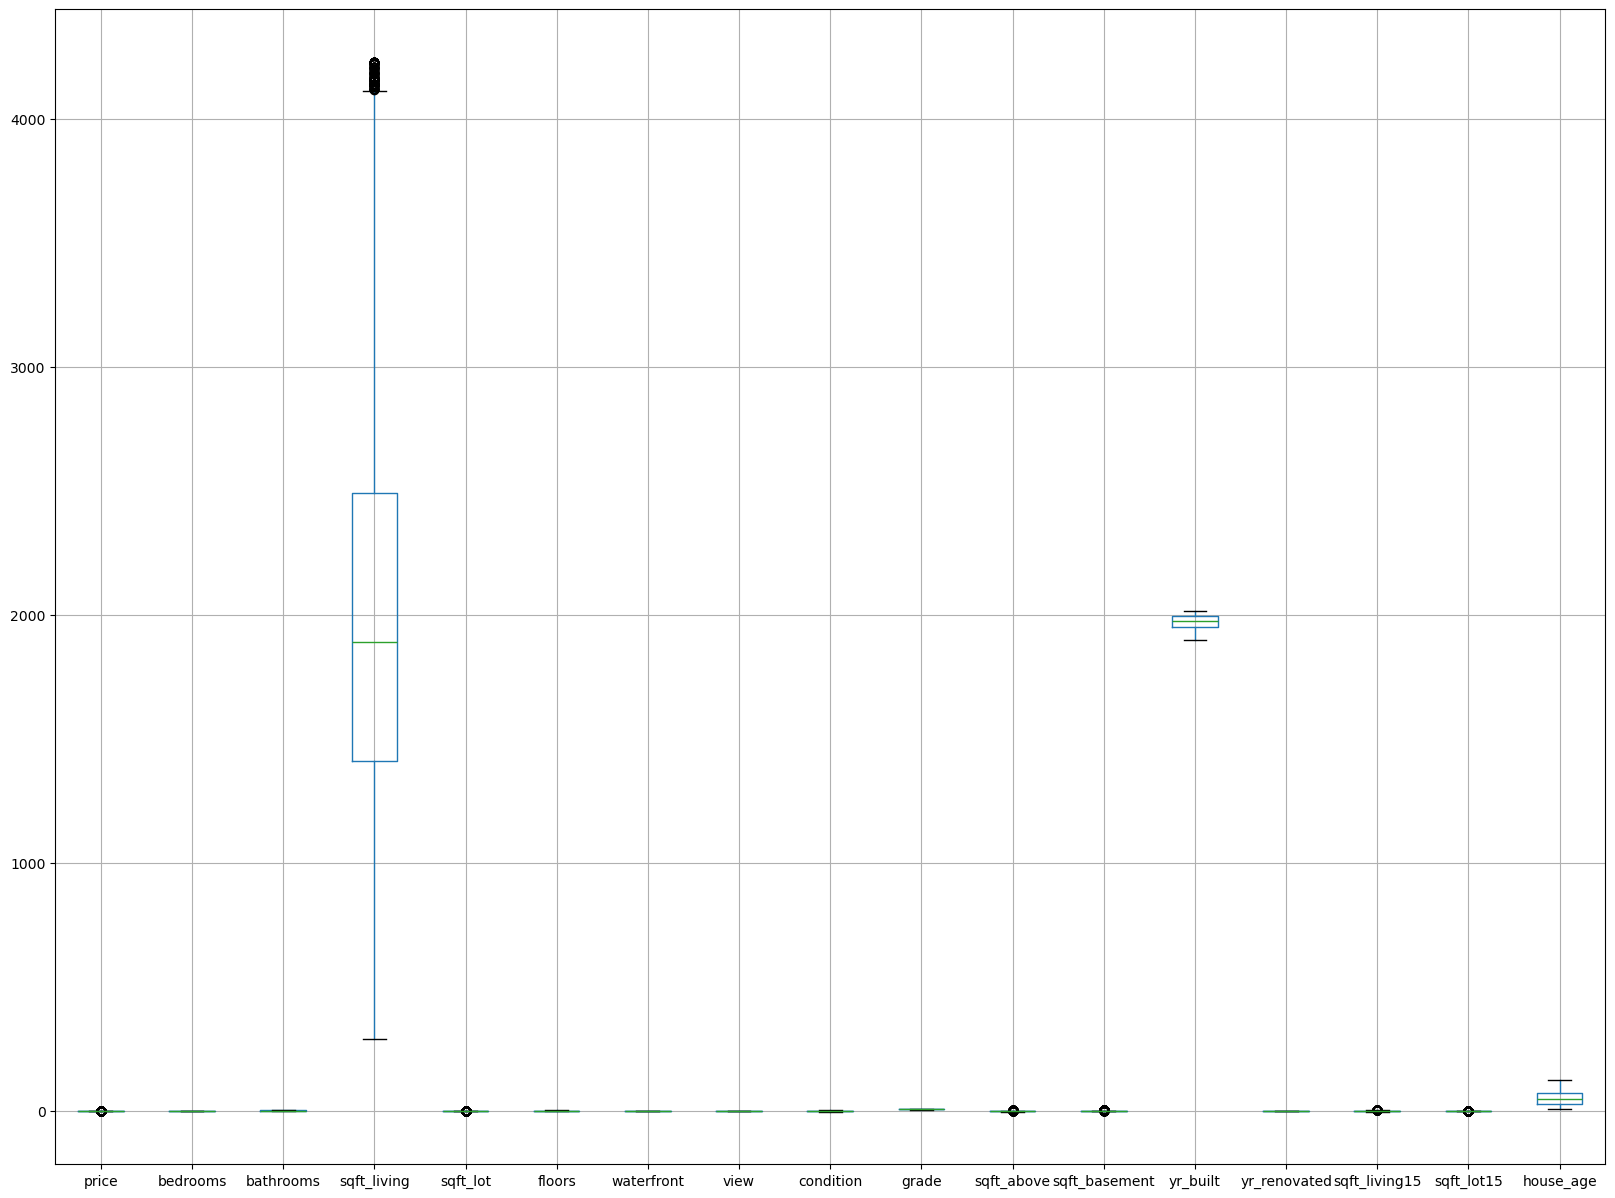

In [22]:
df.boxplot(figsize=(20,15))
'''plt.boxplot(df['bathrooms'])
plt.show()'''

### Below is normalized data ploted on hist plot

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>],
       [<Axes: title={'center': 'house_age'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

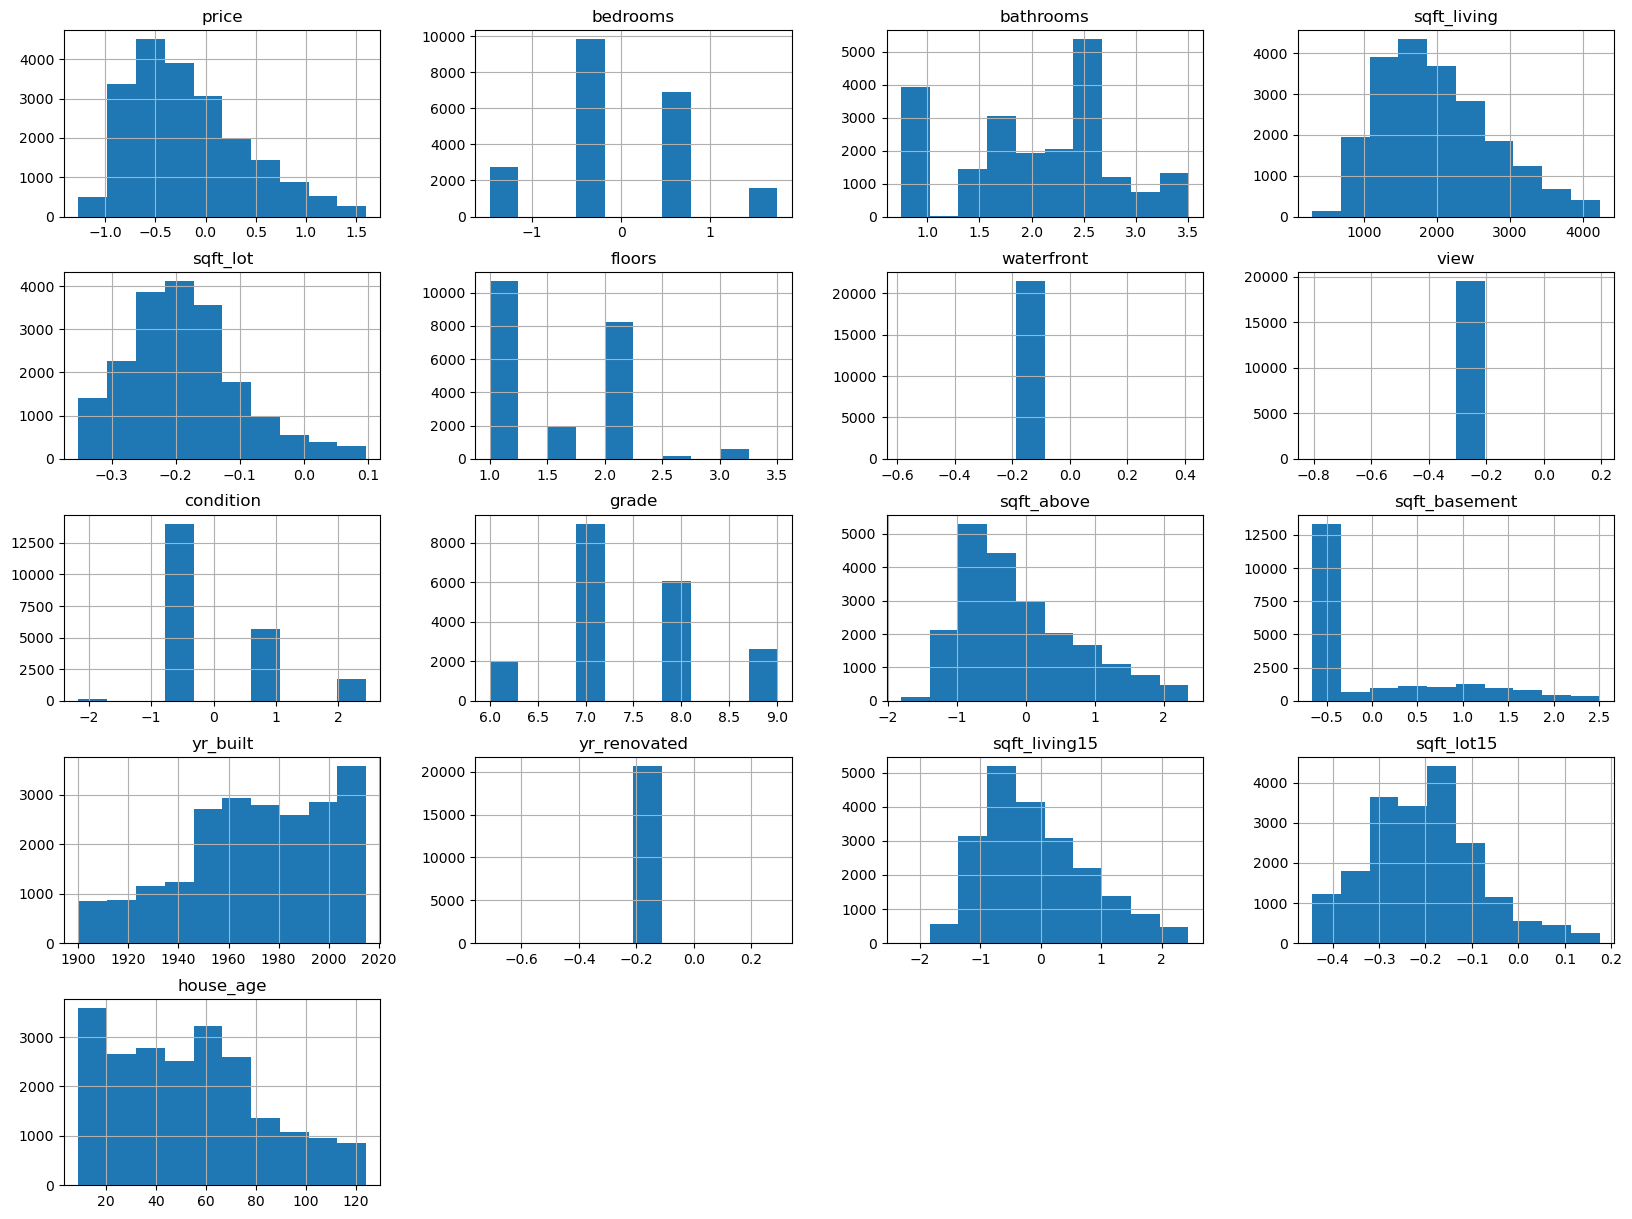

In [24]:
df.hist(figsize=(20,15))

# Correlation 
### correlation :- It measures the relationship between two variables indicating how one variable changes to other. This can be positive realtion, negative realtion, and not realtion and is represented by +1 for positive -1 for negative realtion and 0 for no-realtion. 
### Heatmap :- It is graphical representation of correlation where individuals are represented by colours. Darker the colours means stronger the relation.

In [26]:
# Correlation detection
correlation_matrix=df.corr()
print(correlation_matrix)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.295615   0.435737     0.611868 -0.000124  0.273987   
bedrooms       0.295615  1.000000   0.483637     0.590785  0.221807  0.178390   
bathrooms      0.435737  0.483637   1.000000     0.708457  0.007188  0.506941   
sqft_living    0.611868  0.590785   0.708457     1.000000  0.235879  0.346006   
sqft_lot      -0.000124  0.221807   0.007188     0.235879  1.000000 -0.310550   
floors         0.273987  0.178390   0.506941     0.346006 -0.310550  1.000000   
waterfront          NaN       NaN        NaN          NaN       NaN       NaN   
view                NaN       NaN        NaN          NaN       NaN       NaN   
condition      0.034016  0.013749  -0.132858    -0.059161  0.115118 -0.269762   
grade          0.555143  0.317100   0.594601     0.644638  0.013975  0.440802   
sqft_above     0.494744  0.479878   0.626278     0.834131  0.183968  0.533441   
sqft_basement  0.198872  0.2

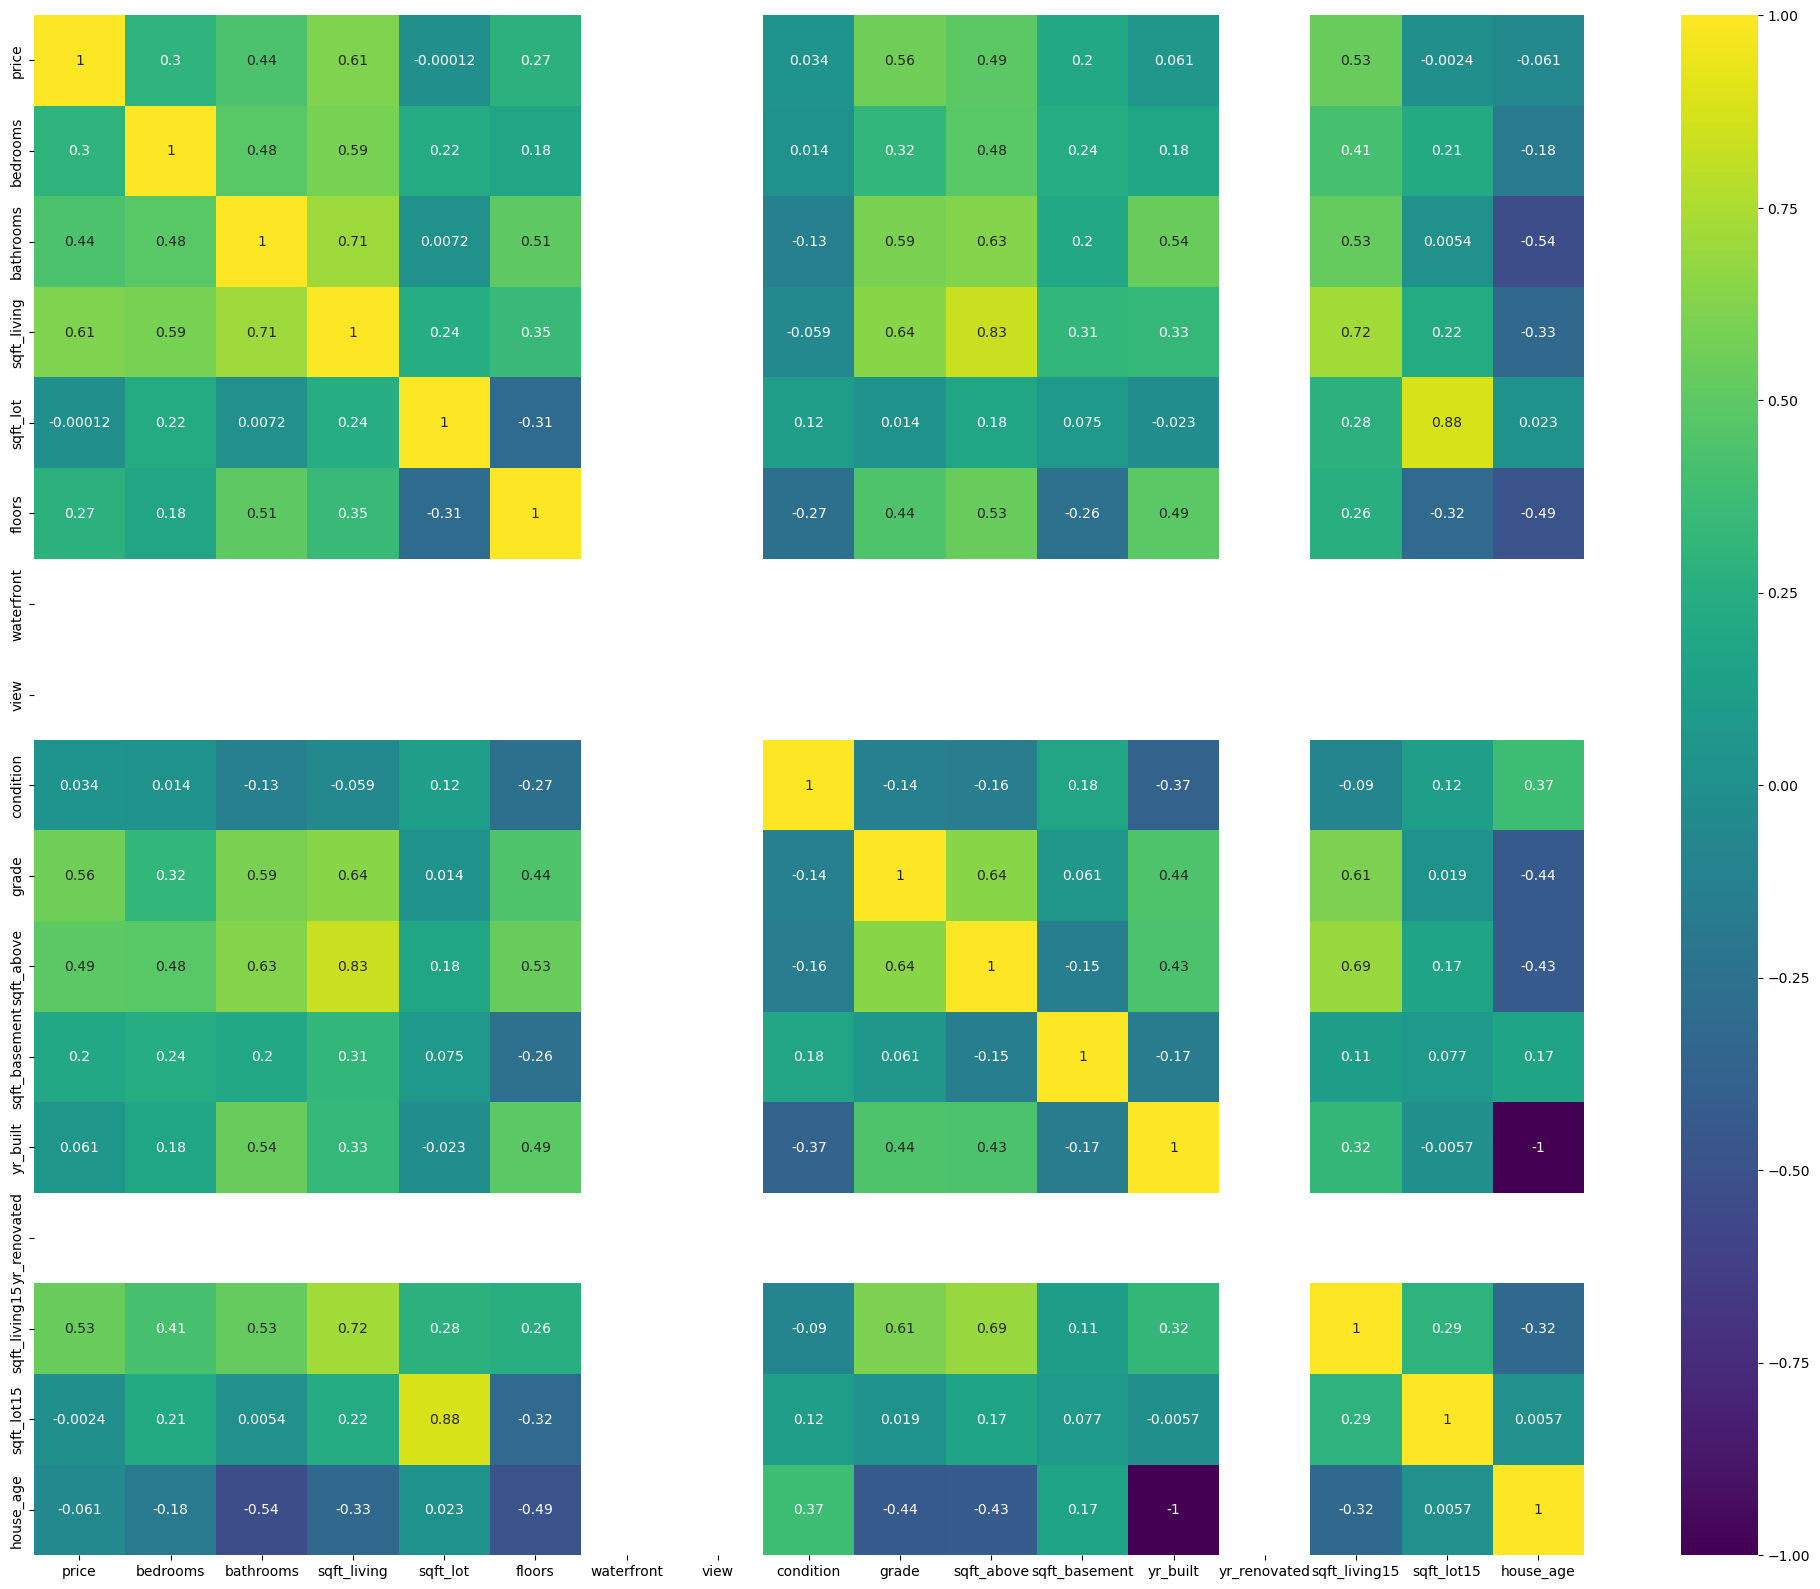

In [27]:
# Correlation matrix
plt.figure(figsize=(25,20))
sns.heatmap(correlation_matrix,annot=True,cmap='viridis')
plt.show()

### After removing outliers we got some null values which need to fix by .fillna()

In [29]:
df = df.drop(['waterfront','view','yr_renovated'],axis=1)

In [30]:
df.isnull().sum()

price            1146
bedrooms          546
bathrooms         571
sqft_living       572
sqft_lot         2425
floors              0
condition          30
grade            1911
sqft_above        611
sqft_basement     496
yr_built            0
sqft_living15     544
sqft_lot15       2194
house_age           0
dtype: int64

In [31]:
df['price'] = df['price'].fillna(df['price'].mean())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())
df['sqft_living'] = df['sqft_living'].fillna(df['sqft_living'].mean())
df['sqft_lot'] = df['sqft_lot'].fillna(df['sqft_lot'].mean())
df['condition'] = df['condition'].fillna(df['condition'].mean())
df['grade'] = df['grade'].fillna(df['grade'].mean())
df['sqft_above'] = df['sqft_above'].fillna(df['sqft_above'].mean())
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].mean())
df['sqft_living15'] = df['sqft_living15'].fillna(df['sqft_living15'].mean())
df['sqft_lot15'] = df['sqft_lot15'].fillna(df['sqft_lot15'].mean())

In [32]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
house_age        0
dtype: int64

# Model Development :-

### Here we are selecting Linear Regression as we have labelled data and input/output variables as target variable, so here supervised learning will be done. 
### Linear Regression :- Linear regression is a powerful tool for modeling the relationship between a dependent variable and one or more independent variables.
### Here we will select features for dataset and target feature as Price of house as we have to predict it using training data which is 20% of whole dataset.

In [34]:
# selecting features
x = df.drop(['price'],axis=1)
y = df['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
# Training model

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Prediction:\n",y_pred)

Prediction:
 [-0.02692567  0.2506596   0.11786833 ...  0.01727887 -0.09320006
 -0.04184004]


# Model Evaluation :-

### Model Evaluation :- Model evaluation is a crucial step in the machine learning process. It involves assessing the performance of a model to ensure it makes accurate predictions on new, unseen data.

### Some common types of techniques are R square, Mean absolute error, mean square error.

In [37]:
# Evaluating model

score = model.score(x_test,y_test)
print('Model R^2 score::',score) 
mse = mean_squared_error(y_test,y_pred)
print('MSE of model:',mse)
mae = mean_absolute_error(y_test,y_pred)
print('MAE of model:',mae) 

Model R^2 score:: 0.43524251419058135
MSE of model: 0.17298836321048675
MAE of model: 0.3201224440098193
